<a href="https://colab.research.google.com/github/jdrake13/IE-542/blob/main/Exam_1_Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#import the packages

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
#import the dataset from scikit-learn package
from sklearn import datasets
#import the dataset
X, y = datasets.load_boston(return_X_y=True)
# this loads the diabetes data as #X is the input matrix as in the slides, and y is the output vector

In [53]:
#if you need to import the data from files
#lorenz_data = np.loadtxt('lorenze3_accurate_N10_D100.txt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f825d657c90>,
      dtype=object)

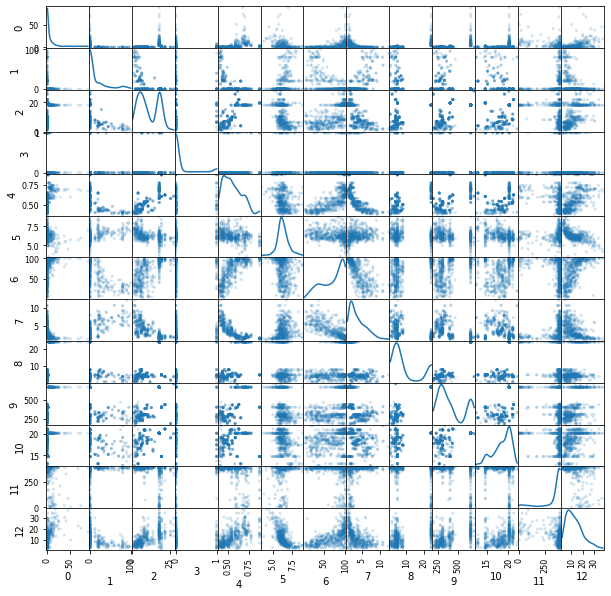

In [54]:
#independency and correlation
import pandas as pd
from pandas.plotting import scatter_matrix
df = pd.DataFrame(X) #transfer the matrix X into the pandas default data frame

#plot the correlation figure of every two variables, use function scatter_matrix()
scatter_matrix(df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde')


In [55]:
#data centering
X = X - X.mean(axis = 0)
#Equvalently, you can use X = X - np.mean(X, axis = 0) 
# np.mean(X, axis = 0) computes the mean for each column, while axis = 1 computes the mean for each row

#can also use y = y-np.mean(y)
y = y- y.mean()

0.0 [-1.00839583]
Mean suqared error:128.20
R squared:-1.08


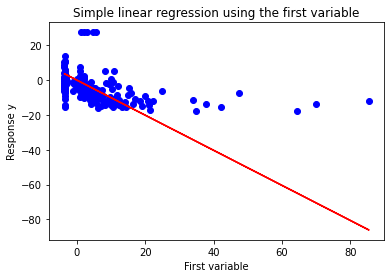

In [56]:
#least squares
#here only shows a demo of using one variable
#i.e., this is simple linear regression
first_X = X[:,0] #we first use only one variable
first_X = first_X[:,np.newaxis] #reshape the vector as a matrix

#then we split the data (X and y) into training and testing
#take the last 40 data points as the test data
#the rest are training data
first_X_train = first_X[:-206]
first_X_test = first_X[-206:]

y_train = y[:-206]
y_test = y[-206:]

#ls is the least square method
ls = linear_model.LinearRegression(fit_intercept = False)
ls.fit(first_X_train,y_train)
print(ls.intercept_, ls.coef_)

#predict the test data
y_predict = ls.predict(first_X_test)

#mean squared error and R squared
print('Mean suqared error:%.2f'
     %mean_squared_error(y_test,y_predict))
print('R squared:%.2f'
     %r2_score(y_test,y_predict))


#plot the predict against the real
plt.figure(1)
plt.xlabel('First variable')
plt.ylabel('Response y')
plt.title('Simple linear regression using the first variable')
plt.scatter(first_X_test, y_test,color='blue')
plt.plot(first_X_test,y_predict,color='red')
plt.show()

In [64]:
#least squares for multiple linear regression
#take the last 40 data points as the test data
#the rest are training data
X_train = X[:-206]
X_test = X[-206:]

y_train = y[:-206]
y_test = y[-206:]

ls_all = linear_model.LinearRegression(fit_intercept = False)
ls_all.fit(X_train,y_train)

#print all the coefficients
print(ls_all.coef_) #these are beta1 to beta10
print(ls_all.intercept_) #this is beta0


#########################################################
#test the model on the test dataset
y_predict = ls_all.predict(X_test)

#mean squared error and R squared on the test data
print('Mean squared error:%.2f'
     %mean_squared_error(y_test,y_predict))
print('R squared:%.2f'
     %r2_score(y_test,y_predict))

[ 0.15293297  0.01020863  0.02701444  0.73859552 -4.14993278  9.19040589
 -0.04585139 -0.90888441  0.05196788 -0.01353339 -0.68644683  0.01392845
 -0.10818997]
0.0
Mean squared error:66.77
R squared:-0.08


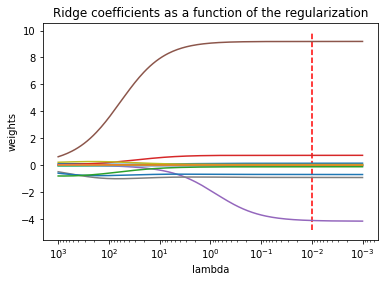

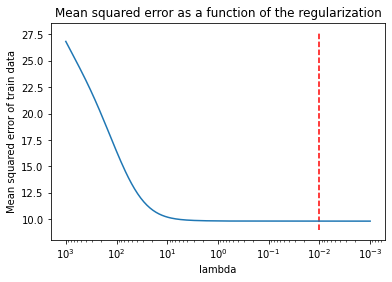

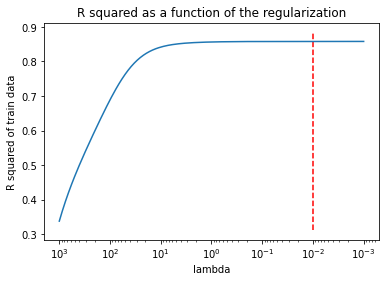

In [58]:
#ridge regression, ridge path

#take the last 40 data points as the test data
#the rest are training data
X_train = X[:-206]
X_test = X[-206:]

y_train = y[:-206]
y_test = y[-206:]

# #############################################################################
# Compute paths
#np.logspace(-10,-2,n_alphas) divide the range[1E-10,1E-2] into n_alphas = 200 intervals
#REMEMBER: alphas in the scikit-learn packages are the lambda in our class
n_lambdas = 200
lambdas = np.logspace(-3, 3, n_lambdas) #[10^(-3), 10^(3)]

coefs = []
test_mse = []
test_r2 = []
for a in lambdas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept= False)#initialize the model with a specific lambda value
    ridge.fit(X_train, y_train) #fit the model 
    coefs.append(ridge.coef_) # then the coeffcients are in element of ridge.coef_
    y_pre = ridge.predict(X_train)
    test_mse.append(mean_squared_error(y_pre, y_train))
    test_r2.append(r2_score(y_pre,y_train))

# #############################################################################
# Display results

#the ridge path
plt.figure(1)
ax = plt.gca()
plt.plot(lambdas, coefs) #plot the coefficients against alpha
ax.set_xscale('log') # set the axis to be log
ax.set_xlim(ax.get_xlim()[::-1])  # reverse x-axis
ymin, ymax = plt.ylim()
plt.vlines(0.01, ymin, ymax, linestyle='dashed',color='red')
plt.xlabel('lambda') #the label of the x axis
plt.ylabel('weights') # the label of the y axis
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

#the mse path
plt.figure(2)
ax = plt.gca()
plt.plot(lambdas,test_mse)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
ymin, ymax = plt.ylim()
plt.vlines(0.01, ymin, ymax, linestyle='dashed',color='red')
plt.xlabel('lambda')
plt.ylabel('Mean squared error of train data')
plt.title('Mean squared error as a function of the regularization')
plt.show()

#the r2 path
plt.figure(3)
ax = plt.gca()
plt.plot(lambdas,test_r2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
ymin, ymax = plt.ylim()
plt.vlines(0.01, ymin, ymax, linestyle='dashed',color='red')
plt.xlabel('lambda')
plt.ylabel('R squared of train data')
plt.title('R squared as a function of the regularization')
plt.show()

In [59]:
#cross validation for ridge

#take the last 40 data points as the test data
#the rest are training data
X_train = X[:-206]
X_test = X[-206:]

y_train = y[:-206]
y_test = y[-206:]

#np.logspace(-10,-2,n_alphas) divide the range[1E-10,1E-2] into n_alphas = 200 intervals
n_lambdas = 200
lambdas = np.logspace(-3, 3, n_lambdas) # we will find the best alpha value in this range

ridge = linear_model.RidgeCV(lambdas, fit_intercept = False) # note: the default CV method is leave-one-out
ridge.fit(X_train,y_train)

print(ridge.alpha_)

#########################################################
#test the model on the test dataset

y_predict = ridge.predict(X_test)
print('Mean squared error:%.2f'
     %mean_squared_error(y_predict, y_test))
print('R squared:%.2f'
     %r2_score(y_predict, y_test))

#########################################################
#if you use the mannually selected alpha = 0.01 
ridge_mannual = linear_model.Ridge(alpha = 0.01, fit_intercept = False)
ridge_mannual.fit(X_train,y_train)
y_mannual_predict = ridge_mannual.predict(X_test)
print('Mean squared error:%.2f'
     %mean_squared_error(y_mannual_predict, y_test))
print('R squared:%.2f'
     %r2_score(y_mannual_predict, y_test))

0.8406652885618325
Mean squared error:65.06
R squared:-0.23
Mean squared error:66.74
R squared:-0.27


Computing regularization path using the LARS ...


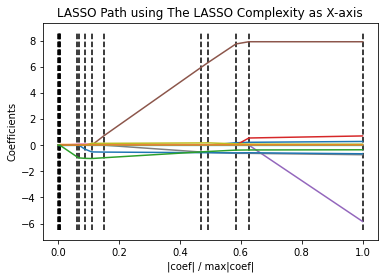

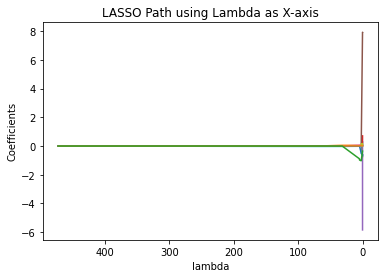

In [60]:
#lasso path using LARS
#note this

#take the last 40 data points as the test data
#the rest are training data
X_train = X[:-206]
X_test = X[-206:]

y_train = y[:-206]
y_test = y[-206:]

print("Computing regularization path using the LARS ...")
lambdas, active, coefs, n_iter = linear_model.lars_path(X_train, y_train, method='lars',return_n_iter =True)

#coefs contains all the coefficients during the LARS path, e.g., if the LARS runs for 500 steps and then terminates, coefs then contains 500 rows, each row is a vector of coefficients
xx = np.sum(np.abs(coefs.T), axis=1) #sum coefficients, this gives the l1 penalty of lasso
xx /= xx[-1] #the last one xx[-1] is the solution of least squares, so this results in the complexity of lasso

######################################################
#plot
#figure 1 is to plot LASSO path using The LASSO complexity as x-axis
plt.figure(1)
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
#plt.vlines(xx[-1], ymin, ymax, linestyle='dashed',color='red')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path using The LASSO Complexity as X-axis')
plt.axis('tight')
plt.show()

#figure 2 is to plot LASSO path using lambda as x-axis
plt.figure(2)
ax=plt.gca()
plt.plot(lambdas, coefs.T)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis, i.e., from the largest lambda to the smallest lambda
#ax.vlines(0.007714743596496163,ymin,ymax,linestyle='dashed',color='red')
plt.xlabel('lambda')
plt.ylabel('Coefficients')
plt.title('LASSO Path using Lambda as X-axis')
plt.axis('tight')
plt.show()



In [61]:
#cross validation for lasso

#take the last 40 data points as the test data
#the rest are training data
X_train = X[:-206]
X_test = X[-206:]

y_train = y[:-206]
y_test = y[-206:]

CV_n = 5 #the number of folds of cross validation

lars = linear_model.LassoLarsCV(cv=CV_n, fit_intercept = False)# need to set how many folds in the cross validation
lars.fit(X_train,y_train)

#the chose alpha of lasso
print(lars.alpha_)

#size = lars.alphas_.size
#ind = [i for i, alpha in zip(range(size), lars.alphas_) if alpha == lars.alpha_]
#print(ind)


#########################################################
#test the model with the selected lambda parameter on the test dataset
y_predict = lars.predict(X_test)
print('Mean squared error:%.2f'
     %mean_squared_error(y_predict, y_test))
print('R squared:%.2f'
     %r2_score(y_predict, y_test))



0.00867486364325246
Mean squared error:65.20
R squared:-0.21


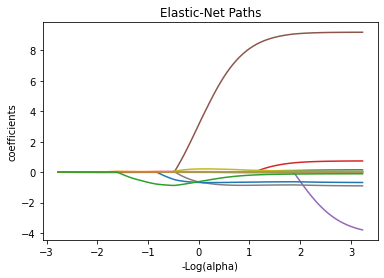

In [62]:
#elastic-net path
#take the last 40 data points as the test data
#the rest are training data
from itertools import cycle
X_train = X[:-206]
X_test = X[-206:]

y_train = y[:-206]
y_test = y[-206:]

#X_train /=X_train.std(axis =0) #standardize the data

#Length of the path. eps=1e-6 means that alpha_min / alpha_max = 1e-6.
#eps: the smaller it is the longer is the path, the smaller it is the larger penalty is added
eps = 1e-6
alphas_enet, coefs_enet, _ = linear_model.enet_path(
    X_train, y_train, eps=eps, l1_ratio=0.8, fit_intercept=False)

#takes the negative logarithm values of alphas_enet
neg_log_alphas_enet = -np.log10(alphas_enet)


######################################################
#plot the coefficients against the penalty strength parameter: alpha
plt.figure(1)

plt.plot(neg_log_alphas_enet, coefs_enet.T)
ymin, ymax = plt.ylim()
plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths')
plt.axis('tight')
plt.show()

In [63]:
#elastic net cross validation
#take the last 40 data points as the test data
#the rest are training data
X_train = X[:-206]
X_test = X[-206:]

y_train = y[:-206]
y_test = y[-206:]

CV_n = 5 #the number of folds of cross validation

#Length of the path. eps=1e-6 means that alpha_min / alpha_max = 1e-6.
#eps: the smaller it is the longer is the path, the smaller it is the larger penalty is added
eps = 1e-6

elasnet = linear_model.ElasticNetCV(l1_ratio = 0.8, eps = eps,  cv=CV_n, random_state = 1,fit_intercept=False)
elasnet.fit(X_train,y_train)

#print which penalty strength is selected
print(elasnet.alpha_)


#########################################################
#test the model with the selected alpha parameter on the test dataset
y_predict = elasnet.predict(X_test)
print('Mean squared error:%.2f'
     %mean_squared_error(y_predict, y_test))
print('R squared:%.2f'
     %r2_score(y_predict, y_test))

0.05133610793924567
Mean squared error:60.24
R squared:-0.14
